In [1]:
from IPython.display import Image

# 문제 설명

* 게임개발자인 "죠르디"는 크레인 인형뽑기 기계를 모바일 게임으로 만들려고 합니다.
* "죠르디"는 게임의 재미를 높이기 위해 화면 구성과 규칙을 다음과 같이 게임 로직에 반영하려고 합니다.

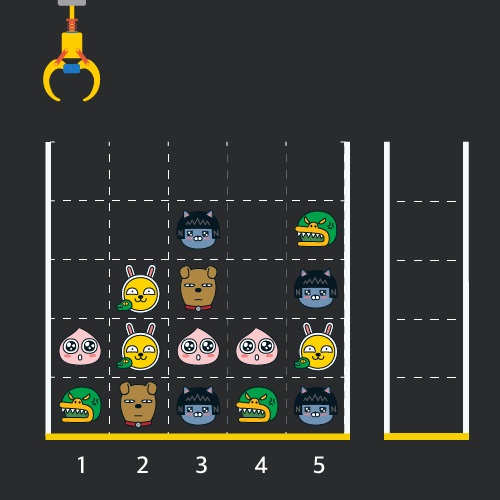

In [2]:
Image('../../../image/doll1.png', width = 400)

* 게임 화면은 "1 x 1" 크기의 칸들로 이루어진 "N x N" 크기의 정사각 격자이며 위쪽에는 크레인이 있고 오른쪽에는 바구니가 있습니다. (위 그림은 "5 x 5" 크기의 예시입니다). 각 격자 칸에는 다양한 인형이 들어 있으며 인형이 없는 칸은 빈칸입니다. 모든 인형은 "1 x 1" 크기의 격자 한 칸을 차지하며 격자의 가장 아래 칸부터 차곡차곡 쌓여 있습니다. 게임 사용자는 크레인을 좌우로 움직여서 멈춘 위치에서 가장 위에 있는 인형을 집어 올릴 수 있습니다. 집어 올린 인형은 바구니에 쌓이게 되는 데, 이때 바구니의 가장 아래 칸부터 인형이 순서대로 쌓이게 됩니다. 다음 그림은 [1번, 5번, 3번] 위치에서 순서대로 인형을 집어 올려 바구니에 담은 모습입니다.

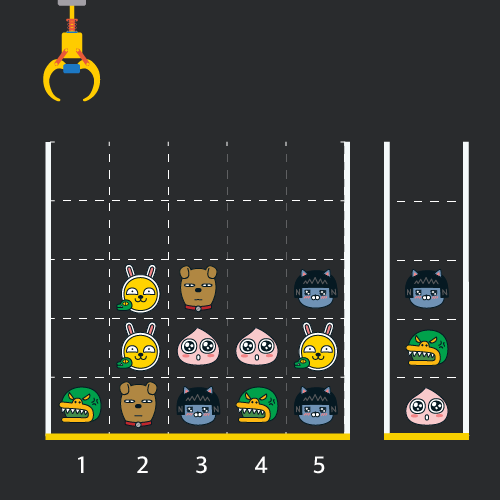

In [3]:
Image('../../../image/doll2.png', width = 400)

* 만약 같은 모양의 인형 두 개가 바구니에 연속해서 쌓이게 되면 두 인형은 터뜨려지면서 바구니에서 사라지게 됩니다. 위 상태에서 이어서 [5번] 위치에서 인형을 집어 바구니에 쌓으면 같은 모양 인형 두 개가 없어집니다.

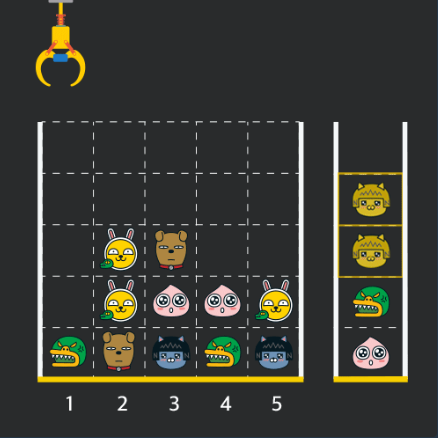

In [4]:
Image('../../../image/doll3.png', width = 400)

* 크레인 작동 시 인형이 집어지지 않는 경우는 없으나 만약 인형이 없는 곳에서 크레인을 작동시키는 경우에는 아무런 일도 일어나지 않습니다. 또한 바구니는 모든 인형이 들어갈 수 있을 만큼 충분히 크다고 가정합니다. (그림에서는 화면표시 제약으로 5칸만으로 표현하였음)
* 게임 화면의 격자의 상태가 담긴 2차원 배열 board와 인형을 집기 위해 크레인을 작동시킨 위치가 담긴 배열 moves가 매개변수로 주어질 때, 크레인을 모두 작동시킨 후 터트려져 사라진 인형의 개수를 return 하도록 solution 함수를 완성해주세요.

# 제한사항

* board 배열은 2차원 배열로 크기는 "5 x 5" 이상 "30 x 30" 이하입니다.
* board의 각 칸에는 0 이상 100 이하인 정수가 담겨있습니다.
    * 0은 빈 칸을 나타냅니다.
    * 1 ~ 100의 각 숫자는 각기 다른 인형의 모양을 의미하며 같은 숫자는 같은 모양의 인형을 나타냅니다.
* moves 배열의 크기는 1 이상 1,000 이하입니다.
* moves 배열 각 원소들의 값은 1 이상이며 board 배열의 가로 크기 이하인 자연수입니다.

# 입출력 예시

|board|moves|result|
|---|---|---|
|[[0,0,0,0,0],[0,0,1,0,3],[0,2,5,0,1],[4,2,4,4,2],[3,5,1,3,1]]|[1,5,3,5,1,2,1,4]|4|

In [5]:
from collections import deque
def solution(board, moves):
    answer = 0
    
    bag = deque([])
    for i in moves:
        for j in range(len(board)):
            if board[j][i-1] != 0:
                bag.append(board[j][i-1])
                board[j][i-1] = 0
            
                if len(bag) > 1:
                    if bag[-1] == bag[-2]:
                        for _ in range(2):
                            bag.pop()
                        answer += 2
                break

    return answer

In [6]:
for board, moves in [[[[0,0,0,0,0],[0,0,1,0,3],[0,2,5,0,1],[4,2,4,4,2],[3,5,1,3,1]], [1,5,3,5,1,2,1,4]]]:
    print(solution(board, moves))

4


# 풀이 과정 및 주의사항

 * board가 가로 기준으로 \['첫째 줄, 둘째 줄 ... 마지막 줄\] 순으로 구성되어있으므로 각 List에서 해당되는 Index에만 탐색해서 0이 아닌경우 bag이라는 deque에 추가해준다.
 * 인형은 2개가 만나면 터지게 된다 그러므로 인형을 추가 후 마지막 2개의 요소가 동일하다면 pop을 2번 실행해 제거한다(deque를 사용한 이유)
 * 인형은 한번에 한개만 추가할 수 있으므로 bag에 인형을 하나 추가한 경우(해당 요소값이 0이 아닌 경우)에는 break로 끊어준다.

https://school.programmers.co.kr/learn/courses/30/lessons/64061